In [12]:
import sys, os

In [13]:
import numpy as np

In [14]:
import matplotlib.pyplot as plt

In [15]:
sys.path.append(os.pardir)

## 시그모이드(sigmoid)

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## 소프트맥스(softmax)

In [17]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## 크로스 엔트로피(cross entropy)

In [18]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 수치 미분

In [19]:
def _numerical_gradient_1d(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        
    return grad

In [20]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_1d(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_1d(f, x)
        
        return grad

## 2층 신경망 설계

In [21]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        
        return accuracy
    
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [22]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [23]:
net.params['W1'].shape

(784, 100)

In [29]:
net.params['b1'].shape

(100,)

In [30]:
net.params['W2'].shape

(100, 10)

In [31]:
net.params['b2'].shape

(10,)

## 예측 예시

In [32]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [33]:
y

array([[0.00098635, 0.00105182, 0.00099471, 0.00094116, 0.0010073 ,
        0.00098078, 0.00100851, 0.00101994, 0.00099384, 0.0010164 ],
       [0.00098599, 0.00105225, 0.00099292, 0.00093747, 0.00100684,
        0.00097866, 0.00100609, 0.00101812, 0.00099574, 0.0010148 ],
       [0.00098918, 0.00105451, 0.0009974 , 0.00093899, 0.00100687,
        0.00098164, 0.00100804, 0.00101887, 0.00099599, 0.00101482],
       [0.00098654, 0.00105505, 0.00099139, 0.00093951, 0.00100749,
        0.00098169, 0.0010086 , 0.00101634, 0.00099599, 0.00101655],
       [0.00098734, 0.00105215, 0.00099515, 0.00094169, 0.00100683,
        0.00098183, 0.00100806, 0.0010225 , 0.0009966 , 0.00101667],
       [0.00098623, 0.0010544 , 0.0009951 , 0.00094157, 0.00100791,
        0.00098036, 0.00100562, 0.00102093, 0.00099356, 0.00101655],
       [0.0009848 , 0.00105432, 0.00099737, 0.00094179, 0.00100673,
        0.00098074, 0.00100472, 0.00102041, 0.0009962 , 0.00101654],
       [0.00098885, 0.00105147, 0.0009965

## 기울기(gradient) 예시

In [34]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

KeyboardInterrupt: 

In [ ]:
grads['W1'].shape

In [ ]:
grads['b1'].shape

In [ ]:
grads

In [36]:
from dataset.mnist import load_mnist

## MNIST 데이터 로드

In [37]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [38]:
x_train[0].shape

(784,)

In [39]:
image1 = x_train[0]

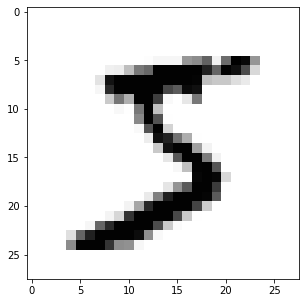

In [40]:
plt.figure(figsize=(5, 5))
image = np.reshape(image1, [28, 28])
plt.imshow(image, cmap='Greys')
plt.show()

# 하이퍼파라미터 설정

In [41]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [42]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [43]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [44]:
iter_per_epoch = max(train_size / batch_size, 1)

In [45]:
for i in range(iters_num):
    print(i)
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 구하기
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # 기울기 방향으로 learning_rate만큼 가중치 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 손실함수 값 구하기
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        # train 정확도
        train_acc = network.accuracy(x_train, t_train)
        # test 정확도
        test_acc = network.accuracy(x_test, t_test)
        
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
    if i == 1:
        break

0


KeyboardInterrupt: 